# Module: Machine Learning and Statistics

# Task 1
### Calculates and prints to the screen the square root of 2 to 100 decimal places.
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

### Research
First look at simple python code to find a square root. as ${x^{0.5}}$ gives the square root of the ${x}$
 

In [1]:
def sqrt2():
    root=2**(1/2)
    return root
print(sqrt2())

1.4142135623730951


by looking at the result it is obvious the decimal places are not 100, to check the number of decimal places of the result <br>use the following code

In [2]:
# To check the number of digits
a=sqrt2()
print(a) # it shows 16 decimal places
#split at the .
split_num = str(a).split('.')
#get the number of digits after .
print("digits after .",split_num[1])
decimal_part =split_num[1]
#print(decimal_part)
print( "The number of decimal places: ",len(str(decimal_part)))


1.4142135623730951
digits after . 4142135623730951
The number of decimal places:  16


In [3]:
#another code to get the number of decimal places
print(sqrt2())
r=sqrt2()
result = str(r)[2:]# get the number after decimal point
print("The number of decimal places:",len(result))

1.4142135623730951
The number of decimal places: 16


As from the above code, it is obvious that by default ** gives result to 16 decimal places.

#### Is it possible to get 100 decimal places. 
Next I look at the floating point documentation as to get the precision to 100 decimal digits, The float in Python is not designed for this kind of precise calculation.On searching online come across **NASA's calculation of squareroot of 2**.<br/>

Than start to look at different algorithms to calculate the  square root of a number.There are different algorithms to get the square root. I looked at following two

1. Newtons Method of Square root
2. Babylonian's method 
<br>*both methods can be implemented in python*</br>

### The Agorithms to get the square root of a number


### 1.  Newtons Method of Square Root

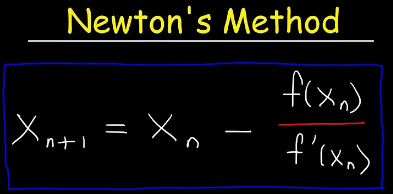

The idea is to start with an initial guess which is reasonably close to the true root, then to approximate the function by its tangent line using calculus, and finally to compute the x-intercept of this tangent line by elementary algebra. This x-intercept will typically be a better approximation to the original function's root than the first guess, and the method can be iterated.

More formally, suppose f : (a, b) → ℝ is a differentiable function defined on the interval (a, b) with values in the real numbers ℝ, and we have some current approximation xn. Then we can derive the formula for a better approximation, xn + 1 by referring to the diagram on the right. The equation of the tangent line to the curve y = f (x) at x = xn is

$\displaystyle y=f'(x_{n})\,(x-x_{n})+f(x_{n}$
where f′ denotes the derivative. The x-intercept of this line (the value of x which makes y = 0) is taken as the next approximation, xn + 1, to the root, so that the equation of the tangent line is satisfied when $\displaystyle (x,y)=(x_{n+1},0)$:

$\displaystyle 0 =f'(x_{n})\,(x_{n+1}-x_{n})+f(x_{n}).$
Solving for $x_{n + 1}$ gives

$\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}.$

In [4]:
#Newton method used to calculate the square root
def approxSqrt(num):
    guess=num
    error=0.0000001
    diff= 999999
    while diff >error:
        newGuess= guess - ((guess**2-num)/(2*guess))
        
        diff= newGuess - guess
        
        if diff<0:
            diff*=-1
        
        guess=newGuess
        
    return guess
approxSqrt(2)

1.4142135623730951

### 2. Newton Raphson Method of Sqareroot:
1. Take a reasonable guess (approximate root) for the square root.

2. Add the approximate root with the original number divided by the approximate root and divide by 2.

 x_i := (x_i + n / x_i) / 2

3. Continue step 2 until the difference in the approximate root along the iterations is less than the desired value (or precision value).
4. The approximate root is the square root we want.

Reference:https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64#:~:text=Algorithm,root%20and%20divide%20by%202.&text=Continue%20step%202%20until%20the,value%20(or%20precision%20value).

In [5]:
# Returns the square root of n. 
def squareRoot(n): 
        n=n
    # We are using n itself as 
    # initial approximation This 
    # can definitely be improved  
        x = n
        difference = 1
          
        # e decides the accuracy level 
        accuracy = 0.000001
        while(difference > accuracy): 
            x1= (x+(n/x))/2
            difference= x-x1
            x=x1
        print(x)
squareRoot(2)

1.414213562373095


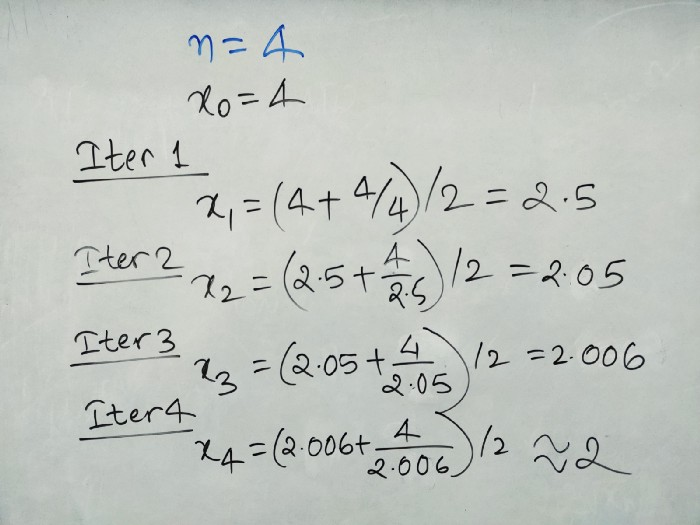

### 3.  Babylonian method for square root
Algorithm:
This method can be derived from (but predates) Newton–Raphson method.


1. Start with an arbitrary positive start value x (the closer to the 
   root, the better).
2. Initialize difference = 1.
3. Do following until desired approximation is achieved.
        a) Get the next approximation for root using average of x and y
        b) Set y = n/x
Ref: https://www.geeksforgeeks.org/square-root-of-a-perfect-square/

In [6]:
def sqrt(number):
    x = number
    y=1
    precision = 10**(-15)
    
    while abs(x - y)/abs(x) > precision:
        x=(x+y)/2
        y=number/x
        
    return x
    

In [7]:
sqrt(2)

1.414213562373095

In [8]:
# Function to return the square root of  
# a number using Newtons method  
def squareRoot(n, l) : 
  
    # Assuming the sqrt of n as n only  
    x = n  
  
    # To count the number of iterations  
    count = 0 
  
    while (1) : 
        count += 1 
  
        # Calculate more closed x  
        root = 0.5 * (x + (n / x))  
  
        # Check for closeness  
        if (abs(root - x) < l) : 
            break 
  
        # Update root  
        x = root 
  
    return root  
# source:https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/#:~:text=Let%20N%20be%20any%20number,correct%20square%20root%20of%20N.

In [9]:
squareRoot(2,0.00000001)

1.414213562373095

### Next have a look at available options in python to print 100 decimal Places
As from the research it was obvious that there are a number of algorithms to calculate the square root available that can be implemented in Python. next task was to find a way to print the result up to 100 decimal places

In [10]:
#print("{:.100f}".format(r))
r=sqrt2()# use the first sqrt2 code
printResult = format(r, ',.100f')
  
print(printResult)


1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [11]:
# the result is printed to 100 decimal places but there are trailing zeros 
print("Total decimal places",len(str(printResult[2:])))
print(len(str(4142135623730951454746218587388284504413604736328125)))

Total decimal places 100
52


52 decimals are fine with trailing zeros

As finding a squareroot is fine but the number of decimal places is an issue as searched online it shows that there is a library decimal which can be used to get more decimal places as use of libraries is not allowed for this task but to look at the available option I looked into it 

In [12]:
from decimal import *
getcontext().prec = 101
Decimal(2).sqrt()

Decimal('1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727')

as from the result above it is obvious that it is possible to get result to 100 decimal places but now I move forward that how can I can achieve it without decimal library

In [13]:
2**0.5

1.4142135623730951

##  Use of ${2 * 10^{200}}$
when looking at different algorithms I found the square root of 2 and squreroot of ${2*10^{2}}$ is same only difference in decimal places so is it possible to get a whole number to 100 digits

- ${2*10^{2} = 14.142135623730951}$
- ${2*10^{4} = 141.42135623730951}$
- ${2*10^{6} = 1414.2135623730951}$
- ${2*10^{8} = 14142.135623730951}$

In [14]:
print(2**0.5)
print((2*10**2)**0.5)
print((2*10**4)**0.5)
print((2*10**6)**0.5)
print((2*10**8)**0.5)
print((2*10**10)**0.5)


1.4142135623730951
14.142135623730951
141.4213562373095
1414.213562373095
14142.13562373095
141421.35623730952


As we see above  if we get 101 integer part long result than put the decimal point in it

In [15]:
#try to print without algorithm
sqrt(2*10**200)

1.414213562373095e+100

### Integer Square root

In [16]:
def sqrttwo(a, digits):
    a = a * (10**(2*digits))
    x_prev = 0
    x_next = 1 * (10**digits)
    while x_prev != x_next:
        x_prev = x_next
        #print(x_prev)
        #x_next = (x_prev + (a // x_prev)) >> 1
        x_next = (x_prev + (a // x_prev)) //2
    #return x_next
    print(f'{x_next // 10**100}.{x_next % 10**100:0100d}')
# modified from source:https://stackoverflow.com/a/5189881

In [17]:
sqrttwo(2,100)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Integer square root of a number
Integer square root of a number is the floor of the square root. To find integer square root of a number. The while condition here would be difference>accuracy. The algorithm terminates when the approximate squared is less than or equal to N.

The iteration relation here is:
${x_{(n+1)} = (x_n + N // x_n) // 2}$ ,
where // is integer division.

In [18]:
# Returns the square root of n. 
def sqrt2(n): 
        n=n*10**200
    # We are using n itself as 
    # initial approximation This 
    # can definitely be improved  
        x = n
        difference = 1
          
        # e decides the accuracy level 
        accuracy = 0.000001
        while(difference > accuracy): 
            x1= (x+(n//x))//2
            difference= x-x1
            x=x1
      
        print(f'{x // 10**100}.{x % 10**100:0100d}') 
        return x

In [19]:
sqrt2(2)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

In [20]:
#Nasa s 100 decimal places
a="4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
#b="4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
b=sqrt2(2)
print(b)
result = str(b)[1:]
print(len(a))
#to check accuracy of result 
print("is the nasa 100 decimal places and the calculated above are same")
print(a==result)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
100
is the nasa 100 decimal places and the calculated above are same
True


## Conclusion
In start this task was bit complicated as my assumption was that I can use floating point number but as I start working on it and understanding the idea of square root algorithms and implementation in python it become clear that the main problem is to get floating point result to 100 decimal places so I come across the idea of Integer square root. I modified two codes to get the result, use square root of 2*10^200 and than print the result and put . in the digits.

## References:
1. https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation 12/10/2020
2. Approximating Square Roots w/ Newton's Method https://www.youtube.com/watch?v=tUFzOLDuvaE 12/10/2020
3. The Square Root of Two to 1 Million Digits https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil 19/10/2020




## Task 2
The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|   | A  | B  |  C |  D |Total|
|---|---|---|---|---|---|
| White Collar  | 90  | 60  |  104 | 95  |349|
|  Blue Collar |  30 | 50  |  51 |  20 |151|
|  No Collar|  30 |  40 |  45 |  35 |150|
|  Total|  150 |  150 | 200 | 150 |650|

## Chi-squared Test

There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:

1. A chi-square goodness of fit test determines if a sample data matches a population.e.g. Goodness of Fit Test.
2. A chi-square test for independence compares two variables in a contingency table to see if they are related. 
<br>In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
    - A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
    - A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

The formula for the chi-square statistic used in the chi square test is:
    $$\chi_c^2 = \sum \frac {(O - E)^2}{E}$$

The chi-square formula.

The subscript “c” are the degrees of freedom. “O” is your observed value and E is your expected value. 

**Chi-square Test is a method that is used to test if there is any relationship between two categorical variables.**
<br><br>
Chi-square test is a test for independence. Therefore, our Hypothesis statements are going to be the following
<br>H0: X and Y are independent.
<br>H1: X and Y are dependent.
<br>X and Y are categoirical variables<br><br>
Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". . You conduct the study and collect the following data:<br><br>
- H0: Each person's neighborhood of residence is independent of the person's occupational classification (Null hypothesis)<br>
- H1: Each person's neighborhood of residence is dependent of the person's occupational classification


When analysis of categorical data is concerned with more than one variable, two-way tables (also known as contingency tables) are employed. These tables provide a foundation for statistical inference, where statistical tests question the relationship between the variables on the basis of the data observed.
The chi-square test is based on a test statistic that measures the divergence of the observed data from the values that would be expected under the null hypothesis of no association. This requires calculation of the expected values based on the data. The expected value for each cell in a two-way table is equal to (row total x column total)/n, where n is the total number of observations included in the table.
Now, let’s calculate the expected value as below formula:
 $$\frac {(total \ rows ) * (total \ columns)}{total \ Observation}$$

…then apply to our contingency table:

### import packages

In [21]:
#import numpy as np
import numpy as np
# import pandas as
import pandas as pd
#import matplotlib.pyplot, it is a Python 2D plotting library
import matplotlib.pyplot as plt
# import seaborn as sns, Seaborn is a library for making statistical graphics in Python
import seaborn as sns
# import scipy.stats as ss
import scipy.stats as ss


### Create the DataFrame

In [22]:
# create the pd data frame
data = {'A':[90, 30, 30], 'B':[60, 50, 40], 'C':[104, 51, 45],'D':[95, 20, 35]} 

df = pd.DataFrame(data, index =['White Collar','Blue Collar','No Collar']) 

df

# Ref: code adopted from https://datatofish.com/create-pandas-dataframe/

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


In [23]:
df.sum()

A    150
B    150
C    200
D    150
dtype: int64

###  Make a data frame with rows and columns sum of data 

In [24]:
sums = df.select_dtypes(np.number).sum().rename('total')

# append sums to the data frame
df2=df
df2=df2.append(sums)
df2["row sum"] = df2.sum(axis=1)
df2
#ref: https://stackoverflow.com/a/41286765

,A,B,C,D,row sum
White Collar,90,60,104,95,349
Blue Collar,30,50,51,20,151
No Collar,30,40,45,35,150
total,150,150,200,150,650


### Calculate the Expected values
For chi-squared tests, the term “expected frequencies” refers to the values we’d expect to see if the null hypothesis is true. To calculate the expected frequency for a specific combination of categorical variables (e.g., white-collar workers in neighborhood A), multiply the column total (A) by the row total (White Collar), and divide by the sample size.

Row total X Column total / Sample Size = Expected value for one table cell
Expected table can be calculated using below formula:


To calculate the expected frequency for the white collar/area A cell in our dataset, do the following:

- Find the row total for White Collar (349)
- Find the column total for A (150)
- Multiply those two values and divide by the sample size (650)

$${150\times {\frac {349}{650}}\approx 80.54}$$

If the null hypothesis is true, we’d expect to see 80.54 White Collar in neighbourhood A  in our sample. 

In [25]:
#look at the options to calculate the expected values
(df2.loc["total"]*349/650).round(2)

A           80.54
B           80.54
C          107.38
D           80.54
row sum    349.00
Name: total, dtype: float64

In [26]:
# first look at how to manipulate the data in dataframe

first = df.loc["White Collar"]
first_sum= first.sum()
second = df.loc["Blue Collar"]
second_sum= second.sum()
third = df.loc["No Collar"]
third_sum= third.sum()
expected_df=df2
#print(expected_df.loc["White Collar"])
#expected_df= df2.apply(lambda x: x*first_sum/650  if x.name == 'A' else x, axis=1)
# Apply a function to one column and assign it back to the column in dataframe
#expected_df= df2.apply(lambda x: x *first_sum/650  if x.name == 'total' else x)
# creating a list of dataframe columns 
#col=df2.head(3)
arr = df2.values
print(arr)
print("===================")
rowSum = arr[:3,4:5]
arr = arr[:,0:4]
print("Row sum:\n",rowSum)
print(arr)
print("===================")
columnSum= arr[3: ,]
print("Column Sum\n",columnSum)
print(arr)
print("===================")
arr = arr[0:3,0:4]
print(arr)

print("===================")
print("Expected values Table")
result= columnSum * rowSum/650
#result = np.sqrt((arr**2).reshape(arr.shape[0],-1,3).sum(axis=-1))/times[:,None]
#result = pd.DataFrame(result, columns=['Velocity_%s'%(x,) for x in list('AB')])
#source: modified from https://stackoverflow.com/a/20875641
print(result.round(2))

[[ 90  60 104  95 349]
 [ 30  50  51  20 151]
 [ 30  40  45  35 150]
 [150 150 200 150 650]]
Row sum:
 [[349]
 [151]
 [150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]
 [150 150 200 150]]
Column Sum
 [[150 150 200 150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]
 [150 150 200 150]]
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]
Expected values Table
[[ 80.54  80.54 107.38  80.54]
 [ 34.85  34.85  46.46  34.85]
 [ 34.62  34.62  46.15  34.62]]


### Contingency Table with the Expected Values
I’ll calculate the expected values for all 12 cells that represent the combinations of the three Classes and four neighbourhood.


In [27]:
result1 = pd.DataFrame(result, columns=['Expected(%s)'%(x,) for x in list('ABCD')], index =['White Collar','Blue Collar','No Collar']) 
result1.round(2)

,Expected(A),Expected(B),Expected(C),Expected(D)
White Collar,80.54,80.54,107.38,80.54
Blue Collar,34.85,34.85,46.46,34.85
No Collar,34.62,34.62,46.15,34.62


### Observed values

In [28]:
df

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


### Calculate the chi-squared statistic,
take the difference between a pair of observed (O) and expected values (E), square the difference, and divide that squared difference by the expected value. Repeat this process for all cells in the contingency table and sum those values. The resulting value is χ2. 

In [29]:
arr=df.values
table_result=np.square(arr-result)/result
result2 = pd.DataFrame(table_result, columns=['(%s)'%(x,) for x in list('ABCD')], index =['White Collar','Blue Collar','No Collar']) 
result2

,(A),(B),(C),(D)
White Collar,1.111527,5.237602,0.106678,2.596723
Blue Collar,0.673968,6.590083,0.443327,6.325183
No Collar,0.615385,0.837607,0.028846,0.004274


In [30]:
print(table_result.sum())
#print the chisquae value
print("The chi-squared value:",result2.values.sum())
 

24.5712028585826
The chi-squared value: 24.5712028585826


**The sum of these quantities over all of the cells is the test statistic; in this case,is approx 24.6**

###  Important considerations about chi-squared values:

Zero represents the null hypothesis. If all your observed frequencies equal the expected frequencies exactly, the chi-squared value for each cell equals zero, and the overall chi-squared statistic equals zero. Zero indicates your sample data exactly match what you’d expect if the null hypothesis is correct.

Squaring the differences ensures both that cell values must be non-negative and that larger differences are weighted more than smaller differences. A cell can never subtract from the chi-squared value.

Larger values represent a greater difference between sample data and the null hypothesis. Chi-squared tests are one-tailed tests rather than the more familiar two-tailed tests. The test determines whether the entire set of differences exceeds a significance threshold. If your χ2 passes the limit, your results are statistically significant! You can reject the null hypothesis and conclude that the variables are dependent–a relationship exists.

### Degree of freedom
For a table with r rows and c columns, the method for calculating degrees of freedom for a chi-square test is (r-1) (c-1). For our example, we have three rows and four columns: (3-1) * (4-1) = 12 df.

### P value
"p" is the probability the variables are independent.
if  p < 0.05, so the result is thought of as being "significant" means variables are not independent.

## Calculate chi square using scipy.stats library

In [31]:
# Chi-squared tests of independence determine whether a relationship exists between two categorical variables.
#Row total X Column total / Sample Size = Expected value for one table cell
#Contingency Table with the Expected Values
#sample size=N=650
#The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df.values
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('\ndof=%d\n' % dof)
print(expected.round(2))
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('\nProbability = %.3f,\tCritical = %.3f,\tStat = %.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.5f' % (alpha, p))
if p <= alpha:
	print('\nDependent (reject H0)')
else:
	print('\nIndependent (fail to reject H0)')
# source: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]

dof=6

[[ 80.54  80.54 107.38  80.54]
 [ 34.85  34.85  46.46  34.85]
 [ 34.62  34.62  46.15  34.62]]

Probability = 0.950,	Critical = 12.592,	Stat = 24.571
Dependent (reject H0)
significance=0.050, p=0.00041

Dependent (reject H0)


### Conclusion
The purpose of this task was to understand Chi-squared test statistic and confirmed that the value of the Chi-squared test statistic for the provided contingency table is 24.571. <br>
Calculating the p-value that is 0.00041 at a significance level of 5%. As p value is less than 0.05 so we can reject the null hypothesis (Each person's neighborhood of residence is independent of the person's occupational classification).<br>

Feature selection always plays a key role in machine learning and Chi-squared test can be used for feature selection.

### References
1. Chi-Square Statistic: How to Calculate It / Distribution https://www.statisticshowto.com/probability-and-statistics/chi-square/
2. How the Chi-Squared Test of Independence Works https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/#:~:text=To%20calculate%20the%20chi%2Dsquared,resulting%20value%20is%20%CF%872.
3. Handling The Chi Square in Statistics with Python https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af
4. Chi-Square Independence Test – What and Why? https://www.spss-tutorials.com/chi-square-independence-test/
5. Fundamental of The Chi Square in Statistics https://medium.com/@nhan.tran/the-chi-square-statistic-p-1-37a8eb2f27bb
6. Calculate Value of The Chi Square https://medium.com/@nhan.tran/the-chi-square-statistic-p-2-92ed4bcefd3
7. Chi-Square Test for Feature Selection in Machine learning https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

## Task 3:
The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation calculation, STDDEV.P and STDDEV.S . The STDDEV.P function performs the above calculation but in the STDDEV.S calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

###  Standard Deviation
Standard Deviation is a measure of how spread out numbers are.
Its symbol is σ (the greek letter sigma)
It is the square root of the Variance
###  Variance
The Variance is defined as:
The average of the squared differences from the Mean.
<br>

#### Here are the two formulas for standard deviation:

- The "Population Standard Deviation":  	$\displaystyle\sqrt{\frac{1}{N} \sum\limits_{i=1}^{n}{(x_i - \mu)^2 }} $
- The "Sample Standard Deviation":	 	$\displaystyle\sqrt{\frac{1}{N - 1} \sum\limits_{i=1}^{n}{(x_i - \bar{x})^2 }}$
<br>
Looks complicated, but the important change is to divide by N-1 (instead of N) when calculating a Sample Variance.


### Excel Functions
Microsoft Excel has two different versions of the standard deviation calculation, **STDDEV.P** and **STDDEV.S**.
1. STDEV.S (S stands for Sample) assumes that its arguments are a sample of the population and formula used is sample standard deviation metioned above
2. If your data represents the entire population, then compute the standard deviation using STDEV.P (P stands for population). and formula used is population standard deviation

### Bessel’s Correction: n-1
#### sample: 
A sample is always a subset of a population it’s intended to represent. Once a sample is taken, there are presumed, hypothetical parameters and distributions built into that sample-representation.
In statistic, we can get some piece of information about a sample (such as a mean, or median) which corresponds to some piece of analogous information about the population.
As increasing sample size increases standard deviation, which converges to the true population standard deviation. Bessel's correction helps smaller samples get larger standard deviations than they would otherwise, hence N-1.


### numpy.std

### numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution, of the array elements. The standard deviation is computed for the flattened array by default, otherwise over the specified axis.<br>
**ddof int**, 
optional Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.<br>
numpy.std use population std formula if we do not include the ddof to calculate sample std ddof=1 should be used
    

In [32]:
#import numpy
import numpy as np
#import matplot lib for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]
#import sqrt
from math import sqrt
# import pandsas
import pandas as pd

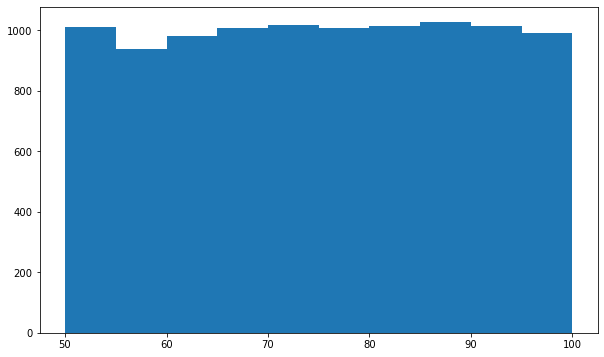

In [33]:
# get a uniform population data
import random
import matplotlib.pyplot as plt
import numpy as np
mu, sigma, popsize = 50, 100, 10000  
population = np.random.uniform(mu,sigma,popsize)
#print(population)
plt.hist(population)
plt.show()

In [34]:
# mean
np.mean(population)

75.13980193914905

In [35]:
# population std using numpy std function
print("Population Standard Deviation: ",np.std(population))

Population Standard Deviation:  14.376628301968008


In [36]:
#population std using formula
stdev=np.sqrt(np.sum((population-np.mean(population))**2)/len(population))
print("Population Standard Deviation: ",stdev)

Population Standard Deviation:  14.376628301968008


As from the above table it is obvious that for small sample size STDDEV.S give value close to population standard deviation

Now pick 5 samples from the population of size 20 and 700

In [37]:
#gat a sample of 20 30 and 50
col=['SAMPLESIZE','STDDEV.P','STDDEV.S']
df = pd.DataFrame(columns=col)
sample=[20,30,100,200,300,400,500,600,700]
#df['samplesize']=sample
for i in sample:
    a=np.random.choice(population, i,replace=False)
    #calculate the std of sample with formula STDDEV.P
    stdevp=np.std(a)
    #print(stdevp)
    #calculate the std of sample with formula STDDEV.S
    
    # std with correction
    stdevs=np.std(a,ddof=1)
    #print(stdevs)
    
#df['difference']=df['stddev.v']-df['stddev.p']
    rowdata = pd.DataFrame(data=[[i, stdevp, stdevs]], columns=col)
        
    df= df.append(rowdata, ignore_index=True)
print('\nPopulation STD',stdev)
df


Population STD 14.376628301968008


,SAMPLESIZE,STDDEV.P,STDDEV.S
0,20,13.375846,13.723329
1,30,12.406473,12.618565
2,100,14.007955,14.078524
3,200,14.694956,14.731832
4,300,14.528174,14.552448
5,400,14.242587,14.260424
6,500,15.045446,15.060514
7,600,14.803787,14.816139
8,700,14.004205,14.014219


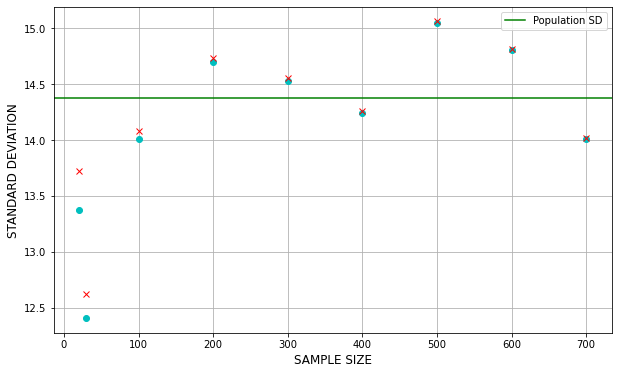

In [38]:
#Plot results
#plt.scatter(df['STDDEV.P'],df['STDDEV.S'])
plt.plot(df['SAMPLESIZE'],df['STDDEV.P'] ,'co')
plt.plot(df['SAMPLESIZE'],df['STDDEV.S'] ,'rx')
# code adopted from for linehttps://stackoverflow.com/a/33382750
plt.axhline(y=stdev, color='g', linestyle='-', label='Population SD')
plt.xlabel('SAMPLE SIZE', fontsize='12')
plt.ylabel('STANDARD DEVIATION', fontsize='12')
plt.grid()
plt.legend()
plt.show()


As we can see from above table and plot, that in small sample size using the sample variance formula give result closer to population Standard deviation.

Standard deviation increases (getting closer to the true std) as sample size gets larger. Applying Bessel's Correction (n-1) seems to help both 'biased' samples

#### uning population data  distributed normally.

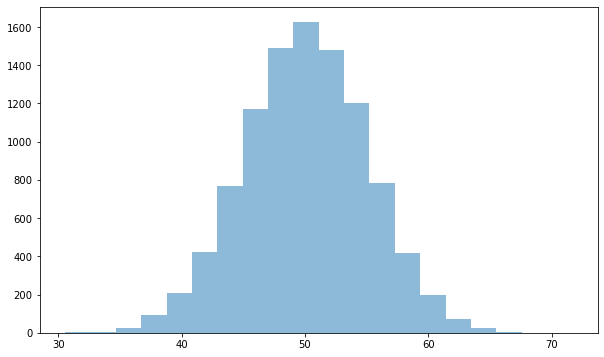

In [39]:
# generate a normal population data
#bi= np.random.binomial(n=100, p=0.5, size=10000)
n_population = np.random.normal(100*0.5, sqrt(100*0.5*0.5), size=10000)

#plt.hist(bi, bins=20);
plt.hist(n_population, alpha=0.5, bins=20);
plt.show();

In [40]:
#population mean
#print(np.mean(bi))
print(np.mean(n_population))

50.0489787433553


In [41]:
#population standard deviation
stdev=np.sqrt(np.sum((n_population-np.mean(n_population))**2)/len(n_population))
print(stdev)

4.993086488088291


In [42]:
#gat a sample of 20 30 and 50
col=['SAMPLESIZE','STDDEV.P','STDDEV.S']
df = pd.DataFrame(columns=col)
sample=[20,100,200]
#df['samplesize']=sample
for i in sample:
    a=np.random.choice(n_population, i)
    #calculate the std of sample with formula STDDEV.P
    stdev2=np.sqrt(np.sum((a-np.mean(a))**2)/(len(a)))
    stdevp=stdev2
    #print(stdevp)
    #calculate the std of sample with formula STDDEV.S
    stdevs=np.sqrt(np.sum((a-np.mean(a))**2)/(len(a)-1))
    #print(stdevs)
    
#df['difference']=df['stddev.v']-df['stddev.p']
    rowdata = pd.DataFrame(data=[[i, stdevp, stdevs]], columns=col)
        
    df= df.append(rowdata, ignore_index=True)
print('\nPopulation STD',stdev)
df


Population STD 4.993086488088291


,SAMPLESIZE,STDDEV.P,STDDEV.S
0,20,4.608321,4.728038
1,100,4.906376,4.931093
2,200,4.938459,4.950852


from the above table it is obvious the in small sample size applying the bassel's correction really worked.

### Calculate Standard Deviation of 400 Random Samples Using Population Standard Deviation Formula¶

In [43]:
sample_standard_deviations = []

for i in range(0, 400):
    random_sample = np.random.choice(n_population, size=30, replace=False)
    sample_std_dev = np.std(random_sample)
    sample_standard_deviations.append(sample_std_dev)

### Visualize Standard Deviation Values

In [44]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(10, 7)})
#sns.set_context('talk')

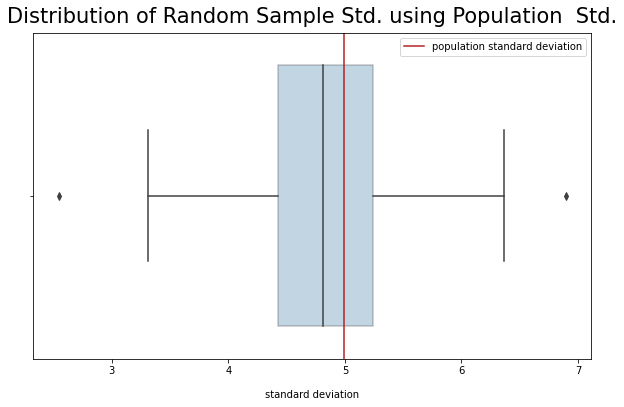

In [45]:
# box plot 
sns.boxplot(sample_standard_deviations, boxprops=dict(alpha=.3))
plt.axvline(x=stdev, label="population standard deviation", color='firebrick')
plt.title("Distribution of Random Sample Std. using Population  Std.", y=1.011, fontsize=21)
plt.xlabel("standard deviation", labelpad=14)
plt.legend();

The boxplot above compare the distribution of the 400 sample standard deviations calculate using np.std that is population STD Formula.<br> The sample standard deviations are typically smaller (an underestimate) than the population standard deviation. This is the issue **Bessel's correction resolves.**

### Calculate Standard Deviation of 400 Random Samples Using Sample Standard Deviation Formula¶

In [46]:
sample_standard_deviations = []

for i in range(0, 400):
    random_sample = np.random.choice(n_population, size=30, replace=False)
    sample_std_dev = np.std(random_sample, ddof=1)
    sample_standard_deviations.append(sample_std_dev)

###  Visualize Standard Deviation Values

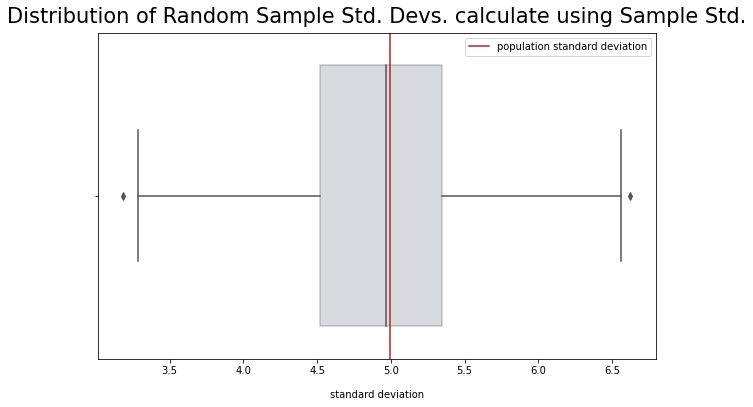

In [47]:
sns.boxplot(sample_standard_deviations, boxprops=dict(alpha=.3), color='lightslategray')
plt.axvline(x=stdev, label="population standard deviation", color='firebrick')
plt.title("Distribution of Random Sample Std. Devs. calculate using Sample Std.", y=1.011, fontsize=21)
plt.xlabel("standard deviation", labelpad=14)
plt.legend();


The boxplot above compares the distribution of the 400 sample standard deviations (using the sample standard deviation formula). The median of the sample standard deviations is nearly the same as the population standard deviation.<br>
This shows that the method for calculating the sample standard deviations using Bessel's correction is fairly good at getting a sample standard deviation value that's similar to the population standard deviation value.

### Exploring Bias in Population Standard Deviation Formula for Samples with Various Sample Sizes

In [48]:
#Create empty DataFrame with columns sample_size and standard_deviation.
df = pd.DataFrame(data={'sample_size': [], 'standard_deviation': []})
#For sample size values in range of 5 to 100 with a step of 10,
#400 simulations of sampling the size of values from mass_values. 
#For each simulation, I calculate the standard deviation and store all those standard deviation values in the df DataFrame.

iterations_per_sample_size = 400
sample_size_range = range(5, 100, 10)

for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(n_population, size=sample_size, replace=False)
        sample_std_dev = np.std(random_sample_values)
        sample_standard_deviations.append(sample_std_dev)
    df2 = pd.DataFrame(data={'sample_size': [sample_size]*iterations_per_sample_size, 'standard_deviation': sample_standard_deviations})
    df = df.append(df2, ignore_index=True)
df.head()

,sample_size,standard_deviation
0,5.0,3.924401
1,5.0,4.030337
2,5.0,4.560695
3,5.0,4.580688
4,5.0,2.875478


### The visualization below shows the distribution of standard deviation values for various sample sizes.
As the sample size increases, there's decreased variability in the standard deviation values. Also, as the sample size increases, the median of the standard deviation values becomes closer to the population mean.

For most small sample sizes, the median standard deviation is fairly far off from the population standard deviation. This indicates there's a slight bias in using the population standard deviation equation for samples.


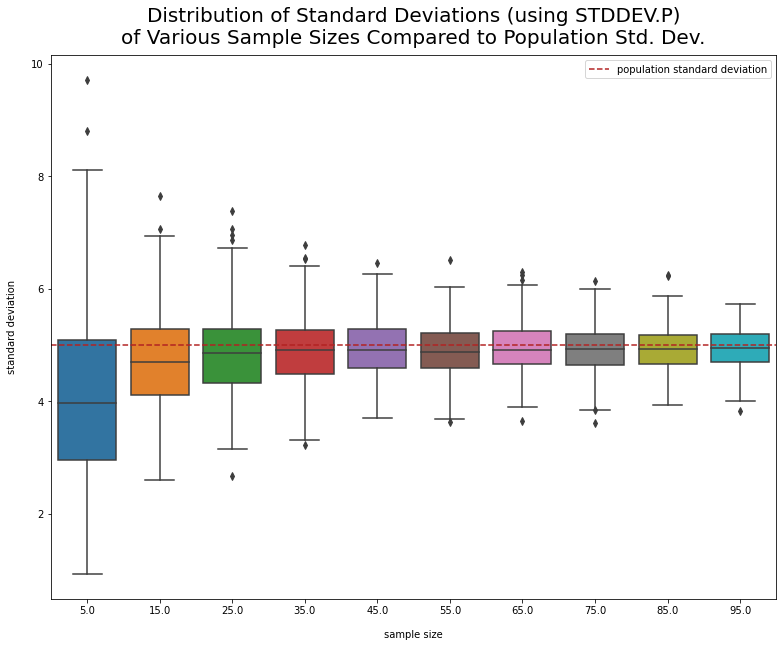

In [49]:
#
plt.figure(figsize=(13, 10))
sns.boxplot(x="sample_size", y="standard_deviation", data=df)
plt.title("Distribution of Standard Deviations (using STDDEV.P)\nof Various Sample Sizes Compared to Population Std. Dev.", y=1.01, fontsize=20)
plt.xlabel("sample size", labelpad=14)
plt.ylabel("standard deviation", labelpad=14)
plt.axhline(y=stdev, label="population standard deviation", color='firebrick', linestyle='--')
plt.legend();

### Sample Standard Deviation Formula for Samples with Various Sample Sizes

In [50]:
#Create empty DataFrame with columns sample_size and standard_deviation.

df = pd.DataFrame(data={'sample_size': [], 'standard_deviation': []})

#For sample size values in range of 5 to 100 with a step of 10,
#400 simulations of sampling the size of values from mass_values. 
#For each simulation, I calculate the standard deviation and store all those standard deviation values in the df DataFrame.

iterations_per_sample_size = 400
sample_size_range = range(5, 100, 10)

for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(n_population, size=sample_size, replace=False)
        sample_std_dev = np.std(random_sample_values,ddof=1)
        sample_standard_deviations.append(sample_std_dev)
    df2 = pd.DataFrame(data={'sample_size': [sample_size]*iterations_per_sample_size, 'standard_deviation': sample_standard_deviations})
    df = df.append(df2, ignore_index=True)

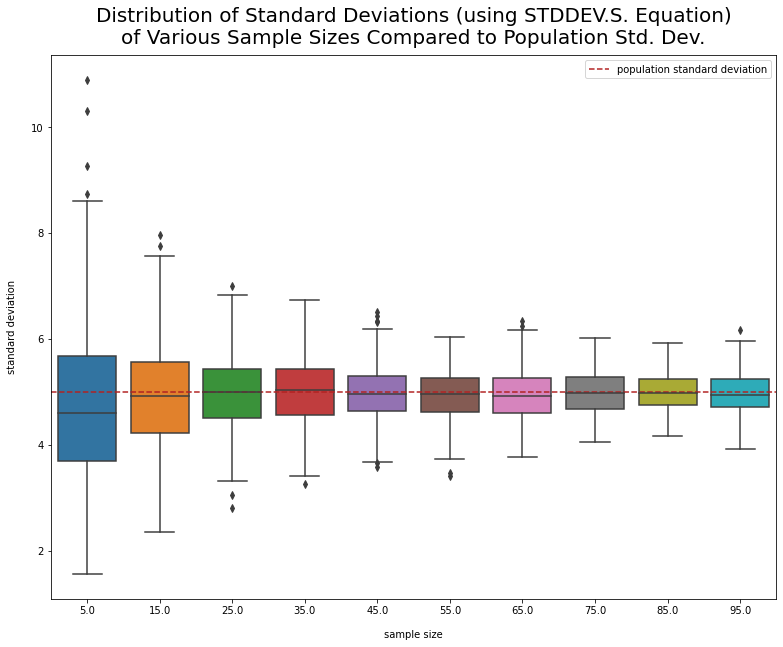

In [51]:
#
plt.figure(figsize=(13, 10))
sns.boxplot(x="sample_size", y="standard_deviation", data=df)
plt.title("Distribution of Standard Deviations (using STDDEV.S. Equation)\nof Various Sample Sizes Compared to Population Std. Dev.", y=1.01, fontsize=20)
plt.xlabel("sample size", labelpad=14)
plt.ylabel("standard deviation", labelpad=14)
plt.axhline(y=stdev, label="population standard deviation", color='firebrick', linestyle='--')
plt.legend();

from these plots it is obvious that for smaller sample sizes  STDDEV.S gives the value of sample standard deviation closer to the actual population std.

## Conclusion

**Standard deviation is a measure of how spread out a set of values are from the mean.**

We generally take a sample of data through a technique such as surveying to analyze statistics of the sample and assume that it would be representative of the population.<br>
If we have a dataset for the entire population, you don't need to calculate sample statistics.<br>
With sampling, samples tend to underestimate variability of a population because if you're sampling from a normal distribution, you'll more likely to choose values centered around the mean and ignore the extremes.
therefore Bessel's correction is used when calculating the standard deviation of a sample to get the value closer to population standard deviation as from the above graphs it is clear that if we use STDDEV.P formula on sample than we get the value of std smaller than the actual population standard deviation.
The difference is more obvious when the sample size is small. for large sample std is close to population std in both formulas

## References
1. Standard Deviation and Variance available online https://www.mathsisfun.com/data/standard-deviation.html accessed on 17/11/2020
2. The Reasoning Behind Bessel’s Correction: n-1 https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9 accessed on 25/11/2020
3. Why Sample Variance is Divided by n-1 https://towardsdatascience.com/why-sample-variance-is-divided-by-n-1-89821b83ef6d accessed on 30/12/2020
4. Bessel's Correction https://dfrieds.com/math/bessels-correction.html accessed on 30/12/2020

## Task4
Use scikit-learn K-Nearest Neighbors Model to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

### K-Nearest Neighbors Algorithm
The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. it is a supervised machine learning algorithm is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.<br>
<br>
It is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.<br>
K-Nearest Neighbors algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.


KNN works because of the deeply rooted mathematical theories it uses. When implementing KNN, the first step is to transform data points into feature vectors, or their mathematical value. The algorithm then works by finding the distance between the mathematical values of these points. The most common way to find this distance is the Euclidean distance,
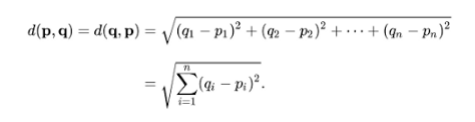

KNN runs this formula to compute the distance between each data point and the test data. It then finds the probability of these points being similar to the test data and classifies it based on which points share the highest probabilities.

In KNN algorithm we need only two parameters value of K and the distance function. it works in following steps
- look at data
- calculate distance
- find neighbours
- vote on labels

### First have a look at  Iris Data set 
The iris data set contains three classes of 50 instances each, where each class refers to a type of Iris plant. Each class is linearly separable from the other two classes. The attribute information include sepal length, sepal width, and
petal length and petal width. All of them have the same unit, cm. 

In [52]:
#load Iris dataset
from sklearn.datasets import load_iris
#import seaborn
import seaborn as sns
import pandas as pd

In [53]:
dataset=load_iris()

data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])
#source: adopted from https://medium.com/@harimittapalli/exploratory-data-analysis-iris-dataset-9920ea439a3e

In [54]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plot to show relationship between attributes

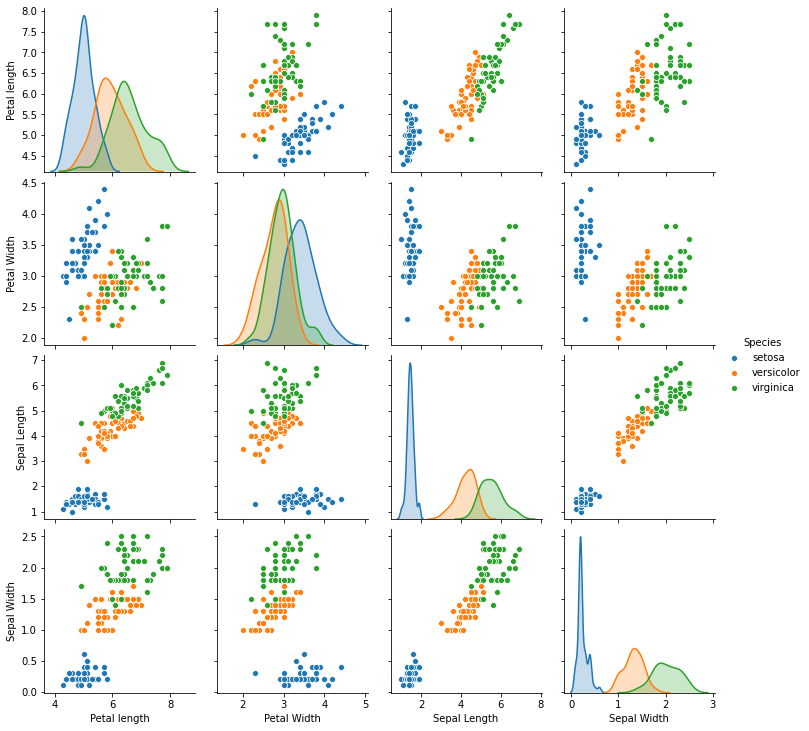

In [55]:
sns.pairplot(data,hue='Species')

### Correlation

In [56]:
print(data.corr())

              Petal length  Petal Width  Sepal Length  Sepal Width
Petal length      1.000000    -0.117570      0.871754     0.817941
Petal Width      -0.117570     1.000000     -0.428440    -0.366126
Sepal Length      0.871754    -0.428440      1.000000     0.962865
Sepal Width       0.817941    -0.366126      0.962865     1.000000


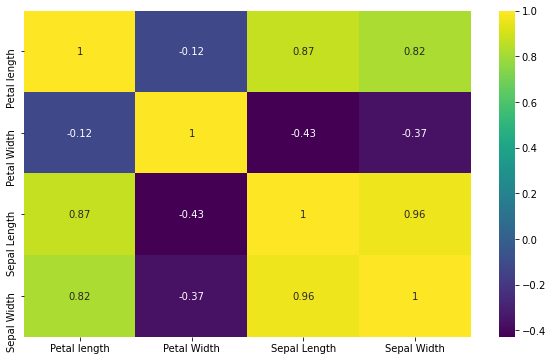

In [57]:
#df3=pd.DataFrame(iris.data, columns=iris.feature_names)
#plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

## Implementation of KNN Model using Scikitlearn
### Preprocessing:
first we split dataset into attributes and labels.

In [74]:
# the features that we need to use
# X contains the four features 
X=dataset.data 

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Each observation represents one flower and 4 columns represents 4 measurements.We can see the features(measures) under ‘data’ attribute, where as labels under ‘features_names’. As we can see below, labels/responses are encoded as 0,1 and 2. Because the features and result should be numeric (Numpy arrays) for scikit-learn models and they should have a specific shape.

In [75]:
# y contains the labels
y=dataset.target
#contains 50 samples for each type of Iris flower.
# In this table, 0 represents setosa, 1 represents versicolor, 2 represents virginica.
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [76]:
# Explore the data
df2= pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                 columns= dataset['feature_names'] + ['target'])


df2['species'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [77]:
# name of four features
print(dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [78]:
# 3 classes of target
print(dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [79]:
#there are 150 rows an 4 columns
print(dataset.data.shape)

(150, 4)


### Train Test Split.
Training and testing on the same data is not an optimal approach, so we do split the data into two pieces, training set and testing set. We use ‘train_test_split’ function to split the data. Optional parameter ‘test-size’ determines the split percentage. ‘random_state’ parameter makes the data split the same way every time you run. Since we are training and testing on different sets of data, the resulting testing accuracy will be a better estimate of how well the model is likely to perform on unseen data.

In [133]:
# splitting the data into training and testing 80% training and 20% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2,random_state=5)

In [134]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### Training and Prediction

Scikit-learn is carefully organized into modules, so that we can import the relevant classes easily. Import the class 'KNeighborsClassifer' from 'neighbors' module and Instantiate the estimator ('estimator' is scikit-learn’s term for a model).<br> 
we are creating an instance (classifier ) of the class KNeighborsClassifer, in other words we have created an object called 'classifier' which knows how to do KNN classification once we provide the data. The parameter 'n_neighbors' is the tuning parameter/hyper parameter (k) . All other parameters are set to default values.
'fit' method is used to train the model on training data (X_train,y_train) and 'predict' method to do the testing on testing data (X_test). 
<br>**Choosing the optimal value of K is critical,** so we fit and test the model for different values for K (from 1 to 20) using a for loop and record the KNN’s testing accuracy in a variable (scores).


In [135]:
#import the KNeighboursClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
#import metrics to check accuracy
from sklearn import metrics
# run from k=1 to k=20 and record the accuracy
k_range= range(1,21)
scores={}
score_list=[]
for k in k_range:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))


Plot the relationship between the values of K and the corresponding testing accuracy using the matplotlib library. As we can see there is a raise and fall in the accuracy and it is quite typical when examining the model complexity with the accuracy. In general as the value of K increase there appears to be a raise in the accuracy and again it falls.
In general the Training accuracy rises as the model complexity increases, for KNN the model complexity is determined by the value of K. Larger K value leads to smoother decision boundary (less complex model). Smaller K leads to more complex model (may lead to overfitting). Testing accuracy penalizes models that are too complex(over fitting) or not complex enough(underfit). We get the maximum testing accuracy when the model has right level of complexity, in our case we can see that for a K value of 3 to 19 our model accuracy is 96.6%.

### Plot accuracy score for different  K values

Text(0, 0.5, 'Testing Accuracy')

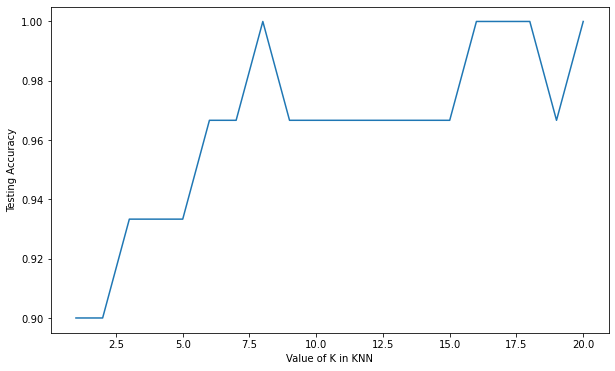

In [136]:
#fig, ax = plt.subplots(figsize=(5,5),dpi=200)
# plot the relation ship between K and the testing accuracy
plt.plot(k_range,score_list)
plt.xlabel('Value of K in KNN')
plt.ylabel('Testing Accuracy')


In [137]:
# for the final model we use k value 5
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 100.0 %.


### Evaluate the Algorithm
for evaluating an algorithm we can use confusion_matrix and classification_report

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



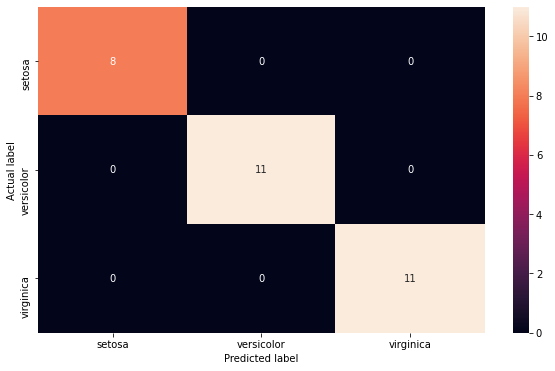

In [139]:
# plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
# trasform to dataframe
cm_df=pd.DataFrame(cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
sns.heatmap(cm_df,annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

as it is apparent from the evaluation of the model that it gives a good accurate results when used for prediction of test data
- The 8 observations in the test data corresponding to setosa species are correctly predicted as setosa.

- The 11 observations in the test data corresponding to versicolor species are correctly predicted as versicolor.

- 11 of the 16 observations in the test data corresponding to virginica species are correctly predicted as virginica. The other two are misclassified as versicolor.<br>
It was accurate result but i run it few times to check it is not giving 100% in all runs.

In [140]:
# make a prediction on some random data
classes ={0:'setosa', 1:'versicolor', 2:'virginica'}
# making prediction on some unseen data
x_new=[[3,4,5,2],[5,4,2,2]]

y_predict=classifier.predict(x_new)
for i in range(0,2):
    print("Predicted Species: ",classes[y_predict[i]])

Predicted Species:  virginica
Predicted Species:  setosa


## Conclusion

- KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problem. 
- Supervised machine learning algorithms use labeled input data to learn a function to solve classifications.
- The algorithm is simple yet powerful classification algorithm.
- As k value effects the accuracy of the prediction so it is important to select optimal k value.
- The KNN algorithm widely used to find document similarity and pattern recognition.<br> In case of Iris data it gives a good result for test data. <br> 
- The algorithm gets significantly slower as the number of predictors/independent variables increase.


## References
1. Machine Learning Basics with the K-Nearest Neighbors Algorithm https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 accessed on 28/12/2020
2. Exploratory Data Analysis : Iris DataSet https://medium.com/@harimittapalli/exploratory-data-analysis-iris-dataset-9920ea439a3e accessed on 28/12/2020
3. K-Nearest Neighbors (KNN) Algorithm for Machine Learning https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26 accessed on 29/12/2020
4. Iris data visualization and KNN classification https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification accessed on 30/12/2020
5. K Nearest Neighbors Algorithm in Python https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ accessed on 30/12/2020
